In [1]:
# Here we will plot the relaxation times for a test alpha particle interacting
# with Maxwellian background ions, electrons, and thermonuclear alpha distributions.
# Please note that we follow the equations 2.14.1 and 2.14.2 in the book:
# Wesson, J. Tokamaks, Vol. 149. Oxford University Press, 2011.
import os
import numpy as np
import matplotlib.pyplot as plt
from fast_particle_collision_time import constants, relaxation_times, dt_fusion

In [2]:
# Now lets set some parameters for the ions
deuterium_density = 0.5e20  # m^-3
tritium_density = 0.5e20  # m^-3
ion_mass = 2.5 * constants.PROTON_MASS # kg
ion_density = deuterium_density + tritium_density
ion_temperature_kev = 20  # keV
ion_temperature_joules = ion_temperature_kev * constants.ELECTRON_CHARGE * 1e3
ion_thermal_speed = np.sqrt(ion_temperature_joules / ion_mass)  # m/s
ion_charge_state = 1


In [3]:
# Now can set the parameters for the electrons
electron_density = ion_density
electron_temperature_kev = ion_temperature_kev  # keV
electron_temperature_joules = electron_temperature_kev * constants.ELECTRON_CHARGE * 1e3
electron_thermal_speed = np.sqrt(electron_temperature_joules / constants.ELECTRON_MASS)  # m/s
electron_charge_state = 1

In [4]:
# We assume the alpha particle density is given by R * tau_{se} where R is the
# DT reaction rate and tau_{se} is the slowing down time due to collisions with
# the electrons
reactivity_cgs = dt_fusion.reactivity(ion_temperature_kev)
reactivity_mks = reactivity_cgs * 1e-6 # Convert from cm^3/s to m^3/s
reaction_rate = deuterium_density * tritium_density * reactivity_mks
speed0 = 1e6  # m/s
slowing_down_time_electrons0 = relaxation_times.slowing_down_time(
    speed0, electron_thermal_speed, constants.ALPHA_ION_MASS, constants.ELECTRON_MASS,
    electron_density, 2, electron_charge_state)
alpha_density = reaction_rate * slowing_down_time_electrons0
alpha_temperature_kev = 1000  # keV
alpha_temperature_joules = alpha_temperature_kev * constants.ELECTRON_CHARGE * 1e3
alpha_thermal_speed = np.sqrt(alpha_temperature_joules / constants.ALPHA_ION_MASS)  # m/s
alpha_charge_state = 2

In [5]:
electron_density = ion_density + 2 * alpha_density

In [6]:
# Parameters for the test particle
test_charge_state = 2
test_mass = constants.ALPHA_ION_MASS

In [7]:
# Now lets create some velocity and energy arrays for the test particle
# The energy of the test particle goes from 3.5 MeV to about 0
test_energies_mev = np.linspace(0.01, 3.5, 100)  # MeV
test_energies_joules = test_energies_mev * 1e6 * constants.ELECTRON_CHARGE
test_speeds = np.sqrt(test_energies_joules / constants.ALPHA_ION_MASS)  # m/s


Now lets look at the slowing down distributions

In [8]:
# def slowing_down_time(test_speed, background_thermal_speed, test_mass, background_mass,
#                       background_density, test_charge_state, background_charge_state):

slowing_down_time_electrons = relaxation_times.slowing_down_time(
    test_speeds, electron_thermal_speed, test_mass, constants.ELECTRON_MASS,
    electron_density, test_charge_state, electron_charge_state)

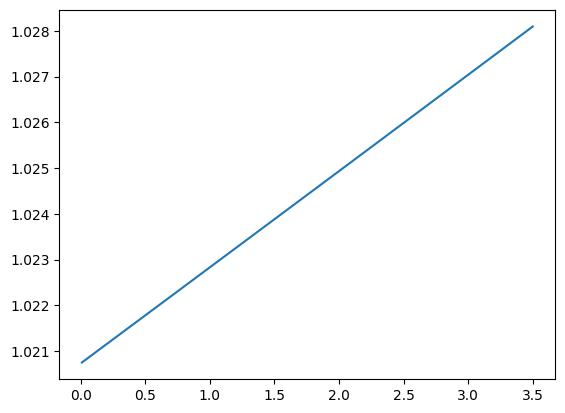

In [9]:
fig, ax = plt.subplots()
ax.plot(test_energies_mev, slowing_down_time_electrons)
plt.show()

In [10]:
slowing_down_time_ions = relaxation_times.slowing_down_time(
    test_speeds, ion_thermal_speed, test_mass, ion_mass,
    ion_density, test_charge_state, ion_charge_state)

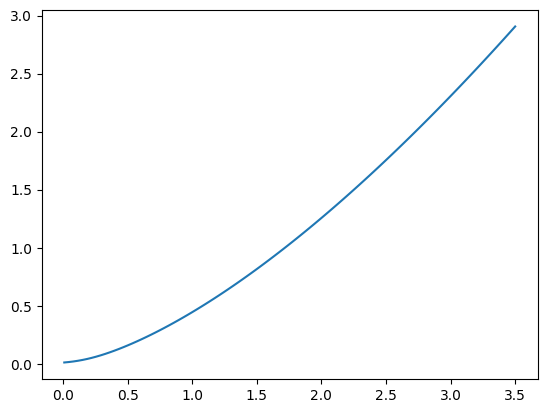

In [11]:
fig, ax = plt.subplots()
ax.plot(test_energies_mev, slowing_down_time_ions)
plt.show()

In [12]:
slowing_down_time_alphas = relaxation_times.slowing_down_time(
    test_speeds, alpha_thermal_speed, test_mass, constants.ALPHA_ION_MASS,
    alpha_density, test_charge_state, alpha_charge_state)

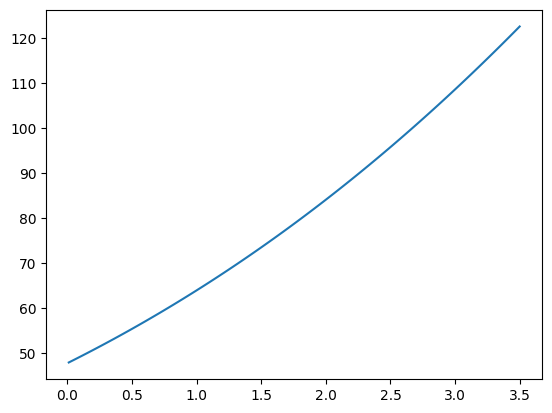

In [13]:
fig, ax = plt.subplots()
ax.plot(test_energies_mev, slowing_down_time_alphas)
plt.show()

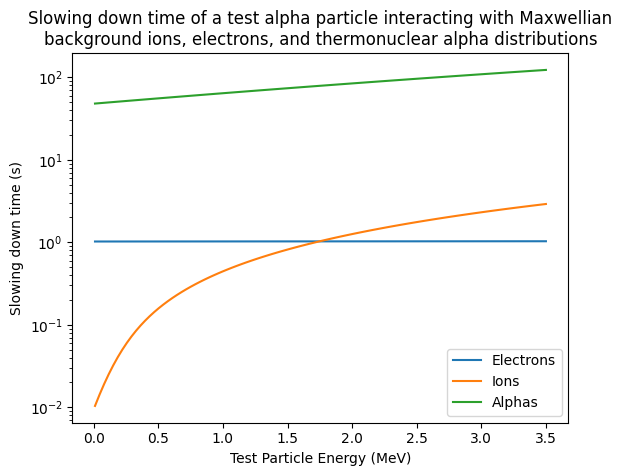

Ion temperature: 20 keV
Electron temperature: 20 keV
Alpha temperature: 1000 keV
Ion density: 1.00e+20 m^-3
Electron density: 1.02e+20 m^-3
Alpha density: 1.13e+18 m^-3


In [14]:
fig, ax = plt.subplots()
ax.plot(test_energies_mev, slowing_down_time_electrons,
        label='Electrons')
ax.plot(test_energies_mev, slowing_down_time_ions,
        label='Ions')
ax.plot(test_energies_mev, slowing_down_time_alphas,
        label='Alphas')
ax.legend()
ax.set_title('Slowing down time of a test alpha particle interacting with Maxwellian' + '\n'
             'background ions, electrons, and thermonuclear alpha distributions')
ax.set_xlabel('Test Particle Energy (MeV)')
ax.set_ylabel('Slowing down time (s)')
ax.set_yscale('log')
notebooks_dir = os.getcwd()
notebooks_plots_dir = os.path.join(notebooks_dir, "notebook_plots")
os.makedirs(notebooks_plots_dir, exist_ok=True)
fig.savefig(os.path.join(notebooks_plots_dir, "slowing_down_times.png"),
            dpi=300, bbox_inches="tight")
plt.show()

print(f"Ion temperature: {ion_temperature_kev} keV")
print("Electron temperature: {} keV".format(electron_temperature_kev))
print("Alpha temperature: {} keV".format(alpha_temperature_kev))
print("Ion density: {:.2e} m^-3".format(ion_density))
print("Electron density: {:.2e} m^-3".format(electron_density))
print("Alpha density: {:.2e} m^-3".format(alpha_density))

Now lets look at deflection times

In [15]:
# def deflection_time(test_speed, background_thermal_speed, test_mass,
#                     background_density, test_charge_state, background_charge_state):
deflection_time_electrons = relaxation_times.deflection_time(
    test_speeds, electron_thermal_speed, test_mass,
    electron_density, test_charge_state, electron_charge_state
)

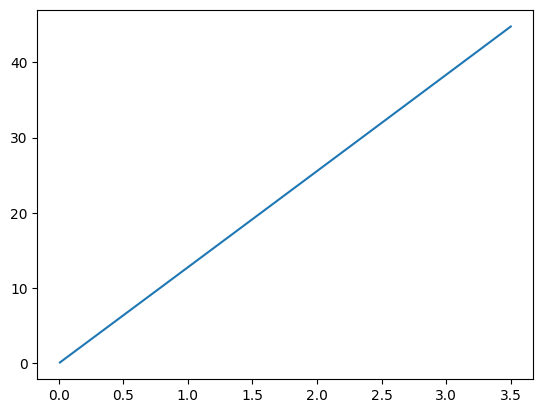

In [16]:
fig, ax = plt.subplots()
ax.plot(test_energies_mev, deflection_time_electrons)
plt.show()

In [17]:
# def deflection_time(test_speed, background_thermal_speed, test_mass,
#                     background_density, test_charge_state, background_charge_state):
deflection_time_ions = relaxation_times.deflection_time(
    test_speeds, ion_thermal_speed, test_mass,
    ion_density, test_charge_state, ion_charge_state
)

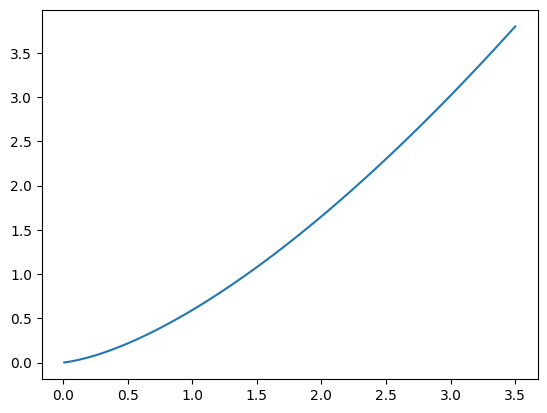

In [18]:
fig, ax = plt.subplots()
ax.plot(test_energies_mev, deflection_time_ions)
plt.show()

In [19]:
# def deflection_time(test_speed, background_thermal_speed, test_mass,
#                     background_density, test_charge_state, background_charge_state):
deflection_time_alphas = relaxation_times.deflection_time(
    test_speeds, alpha_thermal_speed, test_mass,
    alpha_density, test_charge_state, alpha_charge_state
)

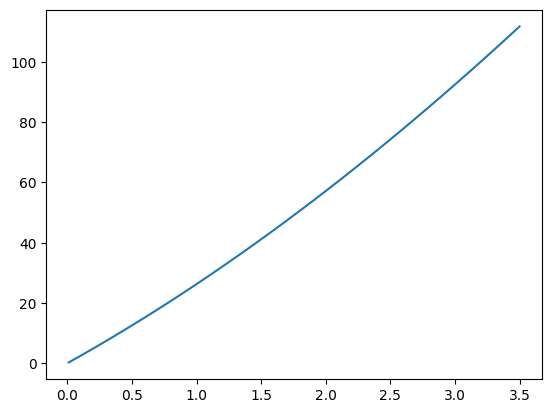

In [20]:
fig, ax = plt.subplots()
ax.plot(test_energies_mev, deflection_time_alphas)
plt.show()

Ion temperature: 20 keV
Electron temperature: 20 keV
Alpha temperature: 1000 keV
Ion density: 1.00e+20 m^-3
Electron density: 1.02e+20 m^-3
Alpha density: 1.13e+18 m^-3


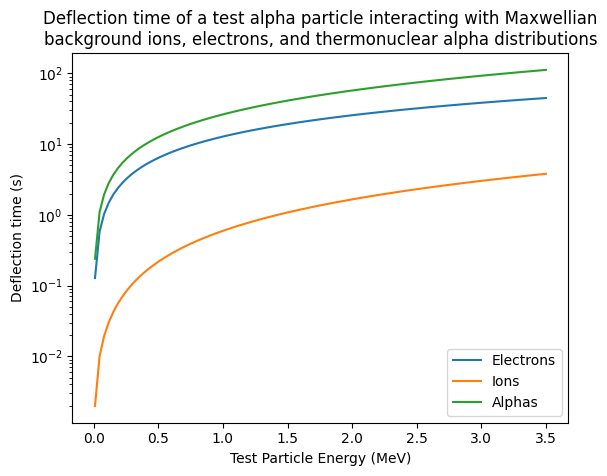

In [21]:
fig, ax = plt.subplots()
ax.plot(test_energies_mev, deflection_time_electrons,
        label='Electrons')
ax.plot(test_energies_mev, deflection_time_ions,
        label='Ions')
ax.plot(test_energies_mev, deflection_time_alphas,
        label='Alphas')
ax.legend()
ax.set_title('Deflection time of a test alpha particle interacting with Maxwellian' + '\n'
             'background ions, electrons, and thermonuclear alpha distributions')
ax.set_xlabel('Test Particle Energy (MeV)')
ax.set_ylabel('Deflection time (s)')
ax.set_yscale('log')
notebooks_dir = os.getcwd()
notebooks_plots_dir = os.path.join(notebooks_dir, "notebook_plots")
os.makedirs(notebooks_plots_dir, exist_ok=True)
fig.savefig(os.path.join(notebooks_plots_dir, "deflection_times.png"),
            dpi=300, bbox_inches="tight")
plt.show

print(f"Ion temperature: {ion_temperature_kev} keV")
print("Electron temperature: {} keV".format(electron_temperature_kev))
print("Alpha temperature: {} keV".format(alpha_temperature_kev))
print("Ion density: {:.2e} m^-3".format(ion_density))
print("Electron density: {:.2e} m^-3".format(electron_density))
print("Alpha density: {:.2e} m^-3".format(alpha_density))

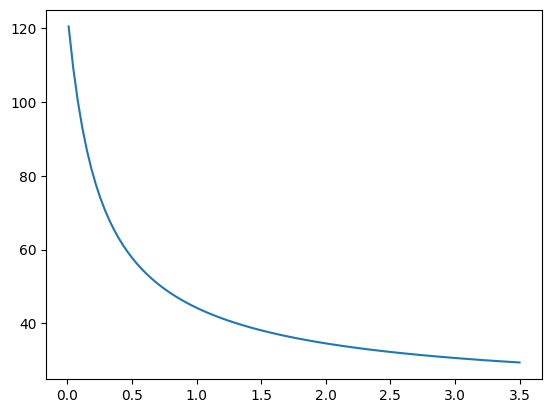

In [22]:
fig, ax = plt.subplots()
ax.plot(test_energies_mev, deflection_time_alphas / deflection_time_ions)
plt.show()